#By Rahmandhika

####This is an assignment for Data Scientist position in Sawitpro. The goal is to analyse the COVID dataset to find:
####1). The probability of dying from COVID infection in France in March 2023 for a 25 years old
####2). The correlation between the number of deaths with age for the US, China, France and Germany,\
#### The dataset can be obtained from Our World in Data. (The dataset can be downloaded through this link: https://ourworldindata.org/covid-cases)


In [58]:
# Import all the important libraries
import pandas as pd
from datetime import datetime as dt
from matplotlib import pyplot as plt
from scipy.stats import linregress

##1). The probability of dying from COVID infection in France in March 2023 for a 25 years old

In [59]:
# import the data into the notebook

df = pd.read_csv("/content/owid-covid-data.csv")

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [60]:
# filter the data for France in the year of 2023
df["date"] = pd.to_datetime(df["date"])

fr_2023_sample = df[(df["location"] == "France") & (df["date"].dt.year == 2023)]

# for this question, we are interested the information of location, date, new cases, new deaths, and population

fr_2023_sample = fr_2023_sample[["location", "date", "new_cases", "new_deaths", "population"]]

fr_2023_sample.head()

,location,date,new_cases,new_deaths,population
79392,France,2023-01-01,0.0,0.0,67813000.0
79393,France,2023-01-02,39087.0,252.0,67813000.0
79394,France,2023-01-03,23012.0,163.0,67813000.0
79395,France,2023-01-04,14105.0,123.0,67813000.0
79396,France,2023-01-05,11536.0,143.0,67813000.0


#### Because there is no any information regarding the age of either infected or death caused by Covid, we assume the number of death are already representing our dataset
#### To find the probability of death caused by Covid for people in French in the year of 2023 (P(x)), we need to understand first how this event happens
#### For this P(x), there are at least 2 sub-events has to be happenned:
####1. Number of people that are being infected in daily (P(a))
####2. Number of death people caused by Covid in daily (P(b))

####Since these two conditions has to be met at the same time, the formula for this event should be:
####P(x) = P(a) * P(b)

####where:
####P(a) = The proportion of people being infected with the population of france in 2023
####P(b) = The proportion of death caused by Covid with the number of people has been infected


In [61]:
# This will be the P(a)
fr_2023_sample["new_case_prob"] = fr_2023_sample["new_cases"] / fr_2023_sample["population"]

# This will be the P(b)
fr_2023_sample["new_death_from_case_prob"] = (fr_2023_sample["new_deaths"] / fr_2023_sample["new_cases"]).fillna(0)

# This will be the P(x)
fr_2023_sample["death_caused_from_covid_prob"] = fr_2023_sample["new_death_from_case_prob"] * fr_2023_sample["new_case_prob"]

fr_2023_sample.head()

,location,date,new_cases,new_deaths,population,new_case_prob,new_death_from_case_prob,death_caused_from_covid_prob
79392,France,2023-01-01,0.0,0.0,67813000.0,0.000000,0.000000,0.000000
79393,France,2023-01-02,39087.0,252.0,67813000.0,0.000576,0.006447,0.000004
79394,France,2023-01-03,23012.0,163.0,67813000.0,0.000339,0.007083,0.000002
79395,France,2023-01-04,14105.0,123.0,67813000.0,0.000208,0.008720,0.000002
79396,France,2023-01-05,11536.0,143.0,67813000.0,0.000170,0.012396,0.000002


In [62]:
# We will find the expected value of our P(x) by counting the mean for the column "death_caused_from_covid_prob"

print("{}%".format(fr_2023_sample["death_caused_from_covid_prob"].mean()*100))

0.0001383399938064973%


[]

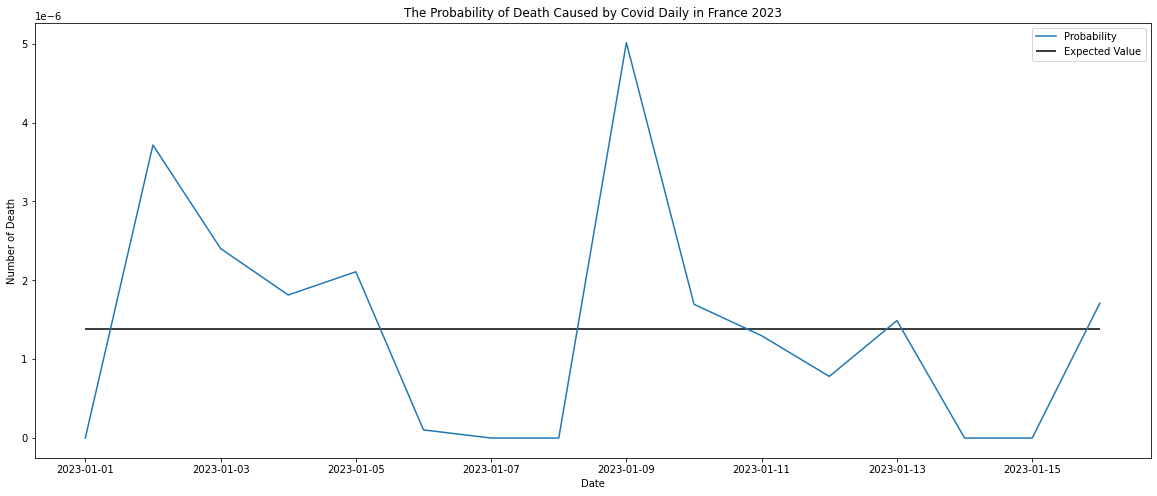

In [63]:
# Or in graphic
plt.subplots(figsize = (20, 8))

plt.plot(fr_2023_sample["date"], fr_2023_sample["death_caused_from_covid_prob"], label = "Probability")
plt.hlines(fr_2023_sample["death_caused_from_covid_prob"].mean(), list(fr_2023_sample["date"])[0], list(fr_2023_sample["date"])[-1], label = "Expected Value")

plt.title("The Probability of Death Caused by Covid Daily in France 2023")

plt.xlabel("Date")
plt.ylabel("Number of Death")

plt.legend()

plt.plot()

####Based on these findings, we can conclude that the probability of death caused by Covid in france for the year 2023 is 0.00013%.

##2). The correlation between the number of deaths with age for the US, China, France and Germany

In [64]:
# Filter the data first 
df_2 = df[df["location"].isin(["United States", "China", "France", "Germany"])]

# Create a pivot based on the number of total_deaths data
df_2_pivot = df_2.pivot(columns = "location", index = "date", values = "total_deaths").reset_index()

# Change Na value into 0, we assume that there is no any death occured at particular date
df_2_pivot = df_2_pivot.fillna(0)

df_2_pivot.head()

location,date,China,France,Germany,United States
0,2020-01-22,17.0,0.0,0.0,0.0
1,2020-01-23,18.0,0.0,0.0,0.0
2,2020-01-24,26.0,0.0,0.0,0.0
3,2020-01-25,42.0,0.0,0.0,0.0
4,2020-01-26,56.0,0.0,0.0,0.0


####To find correlation between these 4 countries, we can apply a formula to calculate the R Value. R Value or known as Correlation Coefficient is a statistical calculation that measures how well the 2 variables are correlated. The value will range from -1 to 1. The further the r value from 0, the least correlated both variables
####The formula looks like this:
#### r = (1/n) * (Σ((xi - x-bar)/σx) * Σ((yi - y-bar)/σy))
####where:
####n = number of sample or population
####xi = every sample or population of x
####x-bar = mean of sample or population of x
####σx = standard deviation of sample or population of x
####yi = every sample or population of y
####y-bar = mean of sample or population of y
####σy = standard deviation of sample or population of y



####But to calculate the r value on each pair of targeted country, we are going to use the scipy modul

In [65]:
#create a list of pair of targeted country

countries = ["United States", "China", "France", "Germany"]

country_pair = []

for n_1 in range(len(countries)):
    for n_2 in range(1, len(countries) - n_1):
        x = countries[n_1]
        y = countries[n_1 + n_2]
        country_pair.append([x, y])

country_pair

[['United States', 'China'],
 ['United States', 'France'],
 ['United States', 'Germany'],
 ['China', 'France'],
 ['China', 'Germany'],
 ['France', 'Germany']]

In [66]:
# count the r value on each pair
r2_country_pair = {}

for pair in country_pair:
    slope, intercept, r_value, p_value, stderr = linregress(df_2_pivot[pair[0]], df_2_pivot[pair[1]])
    r2_country_pair["-".join(pair)] = r_value

r2_country_pair

{'United States-China': 0.6502420492411247,
 'United States-France': 0.9898007201967293,
 'United States-Germany': 0.9915267235403974,
 'China-France': 0.6778978842213763,
 'China-Germany': 0.6112268518055435,
 'France-Germany': 0.9884838491750276}

#### Based on this finding, we can conclude that the most correlated death by covid data is the United States - Germany (0.99) pair, while the least correlated is the China - Germany pair. If we take a look at the graph

[]

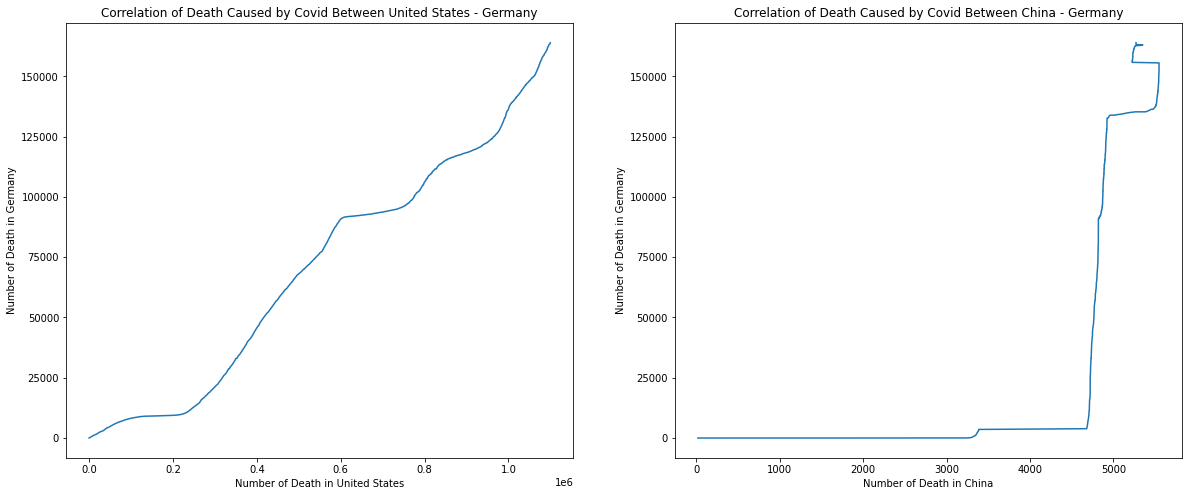

In [67]:
plt.subplots(figsize = (20, 8))
ax1 = plt.subplot(1,2,1)

plt.plot(df_2_pivot["United States"], df_2_pivot["Germany"])

plt.title("Correlation of Death Caused by Covid Between United States - Germany")

plt.xlabel("Number of Death in United States")
plt.ylabel("Number of Death in Germany")

ax1 = plt.subplot(1,2,2)

plt.plot(df_2_pivot["China"], df_2_pivot["Germany"])

plt.title("Correlation of Death Caused by Covid Between China - Germany")

plt.xlabel("Number of Death in China")
plt.ylabel("Number of Death in Germany")

plt.plot()

####We can see that the data of death by Covid at United States - Germany pair is correlated linearly, while the Germany - China pair is poor in terms of correlation between both dataset